# Task
Detect metallic objects in an input image using two different approaches: edge-based filtering and analysis of gradient magnitude/orientation, then visualize and summarize the findings.

## Load Input Image

### Subtask:
Load the input image for metallic object detection.


### Upload Image File

Please upload an image file (e.g., JPG, PNG) that you want to use for metallic object detection. Once uploaded, make sure to note down the file path.

**Reasoning**:
Now that the user has been prompted to upload an image, I will provide the code to load the image using OpenCV and convert it to grayscale, as specified in the instructions. The user will need to replace the placeholder with the actual image path.



Image loaded successfully.
Image resized to: 480x270


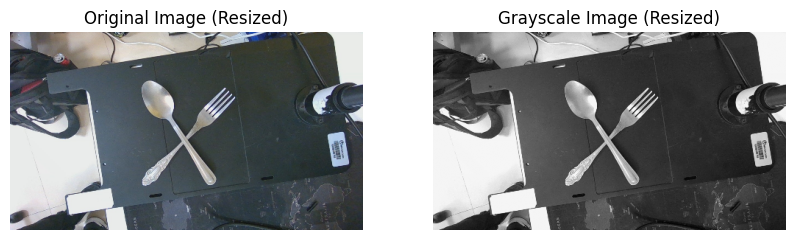

Original image shape: (270, 480, 3)
Grayscale image shape: (270, 480)


In [81]:
import cv2
import matplotlib.pyplot as plt
import torch

# IMPORTANT: Replace 'path/to/your/image.jpg' with the actual path to your uploaded image file.
image_path = 'sample.jpg'

# Load the image
original_image = cv2.imread(image_path)

# Check if image loading was successful
if original_image is None:
    print(f"Error: Could not load image from {image_path}. Please check the path and try again.")
else:
    print("Image loaded successfully.")
    # Resize the image to 480x270
    original_image = cv2.resize(original_image, (480, 270))
    print(f"Image resized to: {original_image.shape[1]}x{original_image.shape[0]}")

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
    blur = gray_image

    # Display the original and grayscale images
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image (Resized)')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(blur, cmap='gray')
    plt.title('Grayscale Image (Resized)')
    plt.axis('off')

    plt.show()

    print("Original image shape:", original_image.shape)
    print("Grayscale image shape:", blur.shape)


## Apply Sobel Operator and Compute Gradients

### Subtask:
Apply the Sobel operator to the input image to find horizontal (Sobel X) and vertical (Sobel Y) edges. Then, compute the gradient magnitude and orientation from these Sobel outputs.


**Reasoning**:
The subtask requires applying the Sobel operator in both X and Y directions, computing gradient magnitude and orientation, normalizing these outputs for display, and then visualizing them using matplotlib.



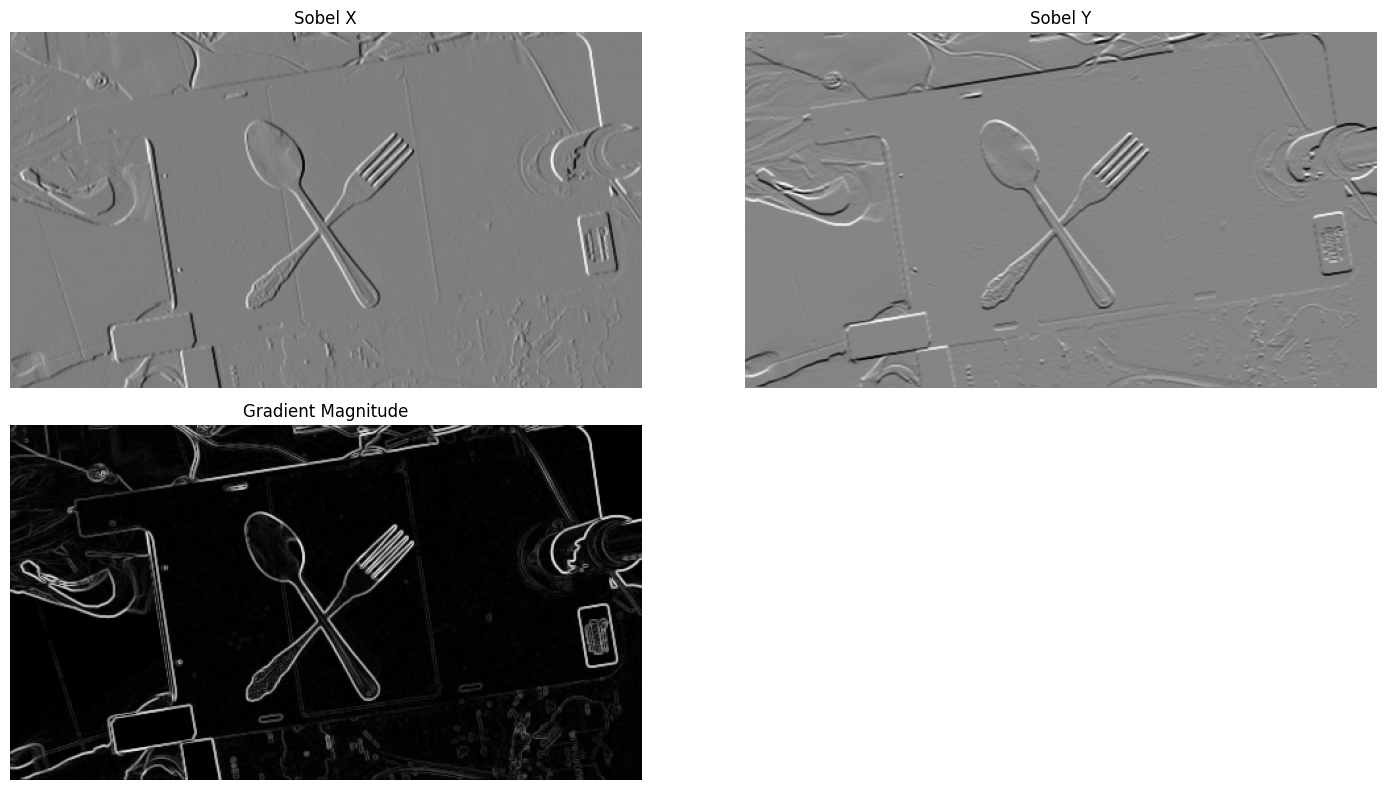

Sobel X min, max: -772.0 778.0
Sobel Y min, max: -806.0 738.0
Gradient Magnitude min, max: 0.0 848.4162
Gradient Orientation min, max: 0.0 6.2814093


In [82]:

def sobel_operator(img):
    gx = cv2.Sobel(img, cv2.CV_32F, 1, 0, ksize=3)
    gy = cv2.Sobel(img, cv2.CV_32F, 0, 1, ksize=3)
    return gx, gy

gx, gy = sobel_operator(blur)

gradient_magnitude = cv2.magnitude(gx, gy)
gradient_orientation = cv2.phase(gx, gy, angleInDegrees=False)

magnitude_normalized = cv2.normalize(
    gradient_magnitude, None, 0, 255, cv2.NORM_MINMAX
).astype(np.uint8)



plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 1)
plt.imshow(gx, cmap="gray")
plt.title(f"Sobel X")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(gy, cmap="gray")
plt.title(f"Sobel Y")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(magnitude_normalized, cmap="gray")
plt.title("Gradient Magnitude")
plt.axis("off")


plt.tight_layout()
plt.show()


print(f"Sobel X min, max:", gx.min(), gx.max())
print(f"Sobel Y min, max:", gy.min(), gy.max())
print("Gradient Magnitude min, max:", gradient_magnitude.min(), gradient_magnitude.max())
print("Gradient Orientation min, max:", gradient_orientation.min(), gradient_orientation.max())



**Reasoning**:
I need to apply a series of image processing steps, including thresholding, contour detection, masking, blurring, and final thresholding, as specified by the instructions to implement the edge-based filtering approach. Visualizing each step will help in understanding the process.



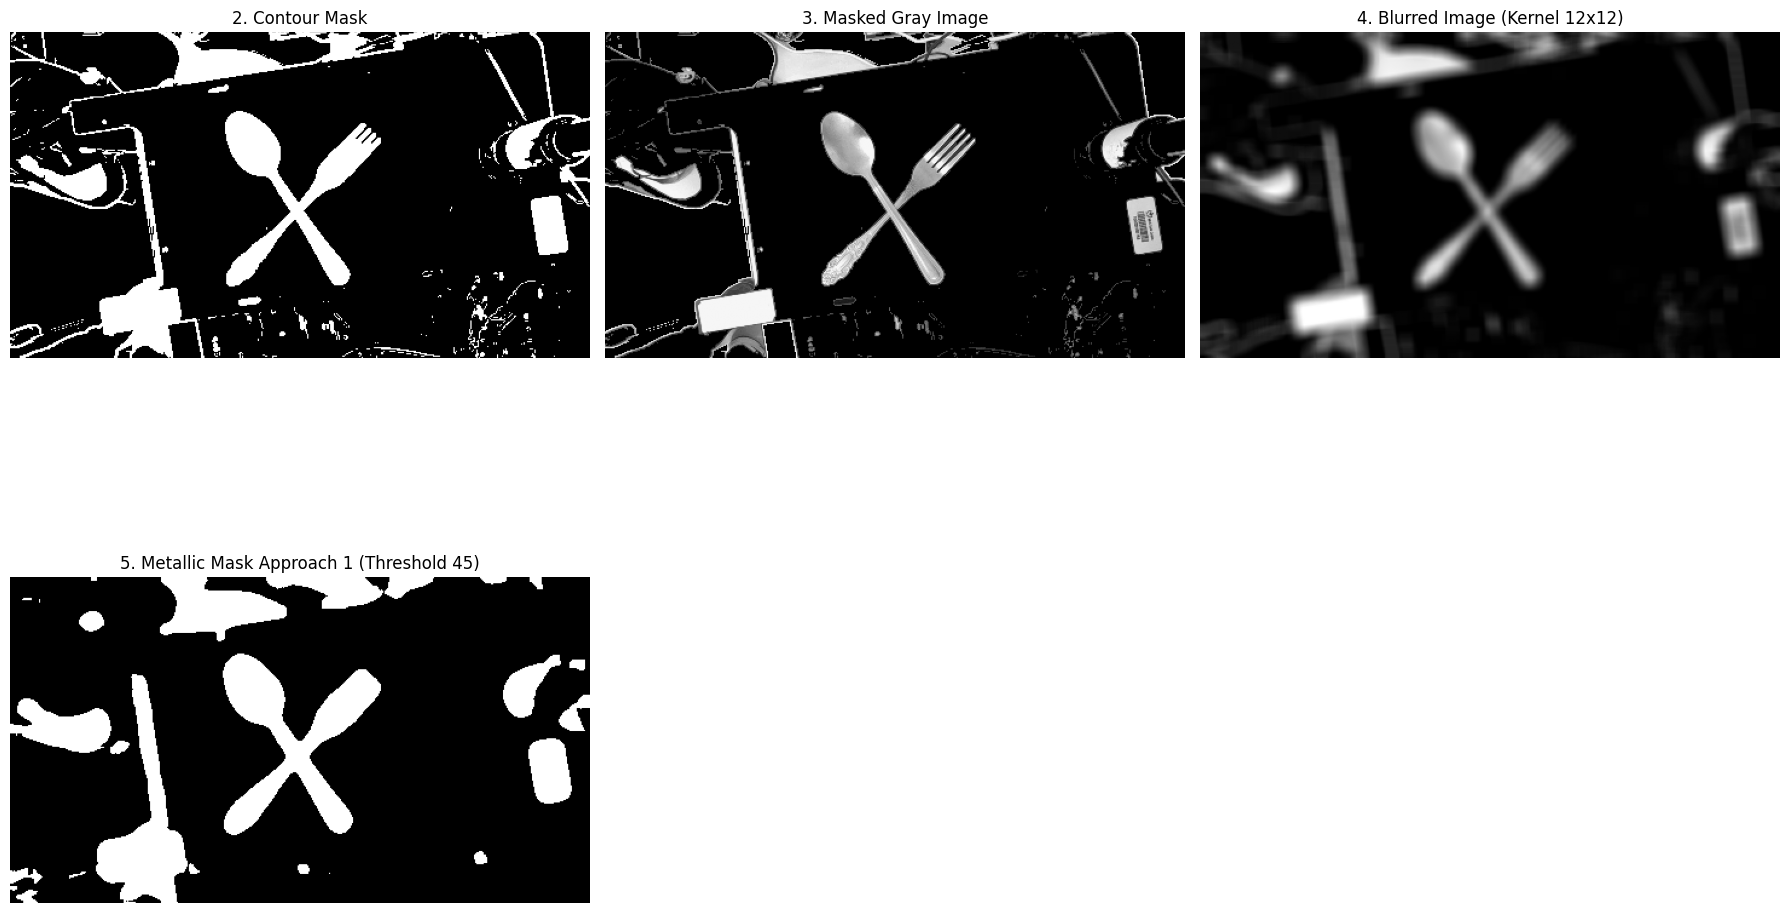

Edge-based filtering approach completed.


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Apply a binary threshold to the magnitude_normalized image
# The threshold value is 50. Edges with magnitude above 50 will be white.
_, binary_edge_map = cv2.threshold(magnitude_normalized, 37, 255, cv2.THRESH_BINARY)

# -------------------------------------------------------------------

# 2. Find contours in the refined_binary_edge_map
# cv2.RETR_EXTERNAL retrieves only the extreme outer contours.
# cv2.CHAIN_APPROX_SIMPLE compresses horizontal, vertical, and diagonal segments and leaves only their end points.
contours, _ = cv2.findContours(binary_edge_map, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 3. Create a blank mask and draw all the found contours onto this mask
contour_mask = np.zeros_like(gray_image)
# Draw filled contours (thickness=-1) with white color (255)
cv2.drawContours(contour_mask, contours, -1, 255, -1)

# 4. Apply the contour_mask to the gray_image
masked_gray_image = cv2.bitwise_and(gray_image, gray_image, mask=contour_mask)

# 5. Apply an averaging blur filter with a kernel size of (12, 12)
blurred_image = cv2.blur(masked_gray_image, (12, 12))

# 6. Apply a binary threshold of 45 to the blurred_image
# This will be the final metallic_mask_approach1
_, metallic_mask_approach1 = cv2.threshold(blurred_image, 37, 255, cv2.THRESH_BINARY)

# Display all intermediate and final results
plt.figure(figsize=(18, 12))


plt.subplot(2, 3, 1)
plt.imshow(contour_mask, cmap='gray')
plt.title('2. Contour Mask')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(masked_gray_image, cmap='gray')
plt.title('3. Masked Gray Image')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(blurred_image, cmap='gray')
plt.title('4. Blurred Image (Kernel 12x12)')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(metallic_mask_approach1, cmap='gray')
plt.title('5. Metallic Mask Approach 1 (Threshold 45)')
plt.axis('off')

plt.tight_layout()
plt.show()

print("Edge-based filtering approach completed.")

## Visualize Detected Metallic Regions

### Subtask:
Display the original image alongside the results from both metallic detection approaches, highlighting the regions identified as metallic. Ensure legends are provided for clarity.


**Reasoning**:
I need to visualize the results of both metallic detection approaches by converting the grayscale masks into colored overlays on the original image and displaying them side-by-side with appropriate titles.



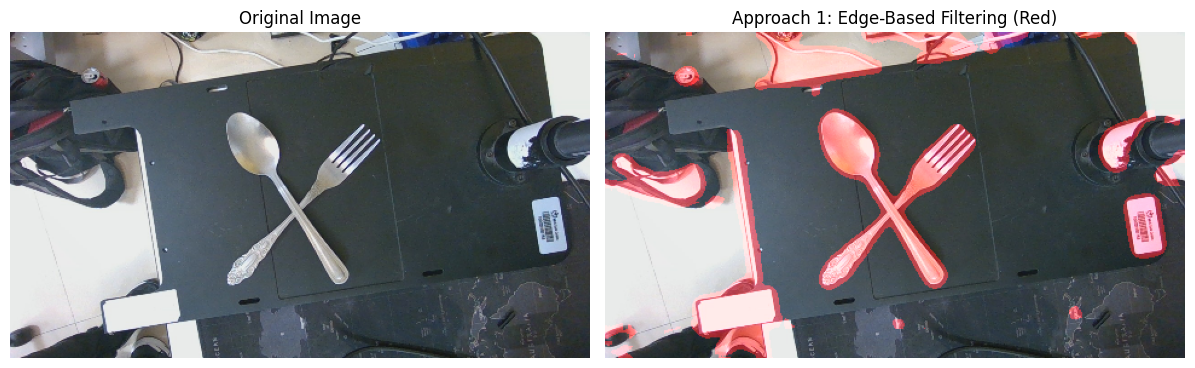

Visualization of detected metallic regions completed.


In [84]:
import numpy as np

# 1. Convert metallic_mask_approach1 to a 3-channel BGR mask, coloring metallic regions in red
red_overlay_mask = np.zeros_like(original_image, dtype=np.uint8)
# Where the mask is white (255), set the corresponding pixels in the overlay mask to red (BGR: 0, 0, 255)
red_overlay_mask[metallic_mask_approach1 == 255] = [0, 0, 255]

# 3. Create two new images by overlaying the colored masks onto the original_image
# Use cv2.addWeighted for blending. The alpha (0.5) controls the transparency of the overlay.
overlay_approach1 = cv2.addWeighted(original_image, 1, red_overlay_mask, 0.5, 0)

# 4. Display the original image, and the images with overlaid results
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(overlay_approach1, cv2.COLOR_BGR2RGB))
plt.title('Approach 1: Edge-Based Filtering (Red)')
plt.axis('off')

plt.tight_layout()
plt.show()

print("Visualization of detected metallic regions completed.")

Visualized metallic masks and central particles from both watershed methods on a black background.


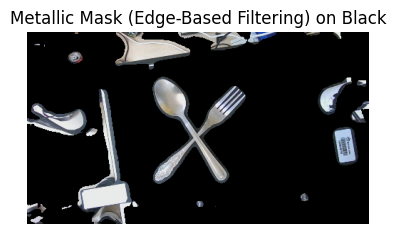

In [85]:
# Ensure 'big' is available and correctly sized for masking
# If big was resized, make sure the masks are also compatible in size.
# For this example, assuming all masks are of the same dimensions as big or gray_image.

# 1. Create a figure with three subplots.
plt.figure(figsize=(15, 6))

# --- Process and display metallic_mask_approach1 ---
# Create a black background (3-channel) the size of the original image
black_background1 = np.zeros_like(original_image, dtype=np.uint8)
# Convert the 1-channel mask to 3-channel for element-wise multiplication
mask1_3_channel = cv2.cvtColor(metallic_mask_approach1, cv2.COLOR_GRAY2BGR)
# Apply the mask to the original image to show only the masked region
masked_image1 = cv2.bitwise_and(original_image, mask1_3_channel)

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(masked_image1, cv2.COLOR_BGR2RGB))
plt.title('Metallic Mask (Edge-Based Filtering) on Black')
plt.axis('off')



print("Visualized metallic masks and central particles from both watershed methods on a black background.")

Loading DETR model...


Some weights of the model checkpoint at facebook/detr-resnet-50-panoptic were not used when initializing DetrForSegmentation: ['detr.model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'detr.model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'detr.model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'detr.model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForSegmentation from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForSegmentation from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Running inference...
DEBUG: Result keys: ['png_string', 'segments_info']
Visualizing results...
ID: 0, Label: LABEL_189, is_thing: False
ID: 1, Label: fork, is_thing: True


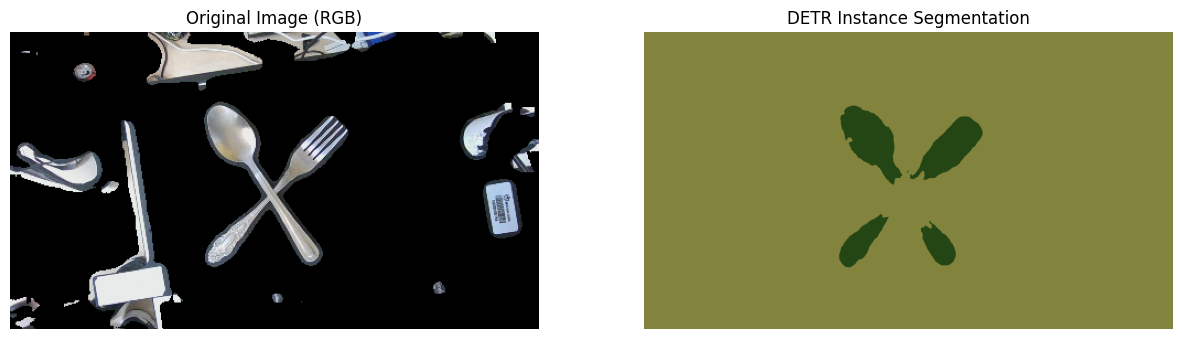

In [86]:
# DETR Instance Segmentation
from PIL import Image
from transformers import DetrImageProcessor, DetrForSegmentation
import random

# Ensure masked_image1 is RGB
if 'masked_image1' in locals():
    if isinstance(masked_image1, np.ndarray):
        # masked_image1 is likely BGR since it came from cv2.bitwise_and(big, ...)
        image_rgb = cv2.cvtColor(masked_image1, cv2.COLOR_BGR2RGB)
        pil_image = Image.fromarray(image_rgb)
    else:
        print("masked_image1 is not a numpy array.")
        pil_image = Image.new('RGB', (480, 270), color = 'red')
else:
    print("masked_image1 not found.")
    pil_image = Image.new('RGB', (480, 270), color = 'red')

# Load model
print("Loading DETR model...")
try:
    processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50-panoptic")
except ImportError:
    from transformers import DetrFeatureExtractor
    processor = DetrFeatureExtractor.from_pretrained("facebook/detr-resnet-50-panoptic")

model = DetrForSegmentation.from_pretrained("facebook/detr-resnet-50-panoptic")

# Inference
print("Running inference...")
inputs = processor(images=pil_image, return_tensors="pt")
outputs = model(**inputs)

# Post-processing
processed_sizes = torch.as_tensor(inputs["pixel_values"].shape[-2:]).unsqueeze(0)
result = processor.post_process_panoptic(outputs, processed_sizes)[0]

import io
print(f"DEBUG: Result keys: {list(result.keys())}")

if "segmentation" in result:
    panoptic_seg = result["segmentation"]
    panoptic_seg = panoptic_seg.cpu().numpy()
elif "png_map" in result:
    panoptic_seg = result["png_map"]
    panoptic_seg = panoptic_seg.cpu().numpy()
elif "png_string" in result:
    # Decode PNG string to numpy array
    panoptic_seg = np.array(Image.open(io.BytesIO(result["png_string"])))
    # Panoptic PNGs from transformers usually encode semantic ID in R, G, B channels
    # But for DETR 'facebook/detr-resnet-50-panoptic', it typically fits into the format expected by the visualizer directly or we treat it as map.
    # If it is RGB, we might need to convert RGB to ID. 
    # However, let's look at the shape first.
    if len(panoptic_seg.shape) == 3:
        # RGB to ID conversion standard for COCO panoptic:
        panoptic_seg = panoptic_seg.astype(np.int32)
        # id = R + G * 256 + B * 256 * 256
        panoptic_seg = panoptic_seg[:, :, 0] + (panoptic_seg[:, :, 1] * 256) + (panoptic_seg[:, :, 2] * 256 * 256)
        # panoptic_seg = panoptic_seg.astype(np.uint8) # IDs can be large, keeping as int32
else:
    raise KeyError(f"Could not find segmentation map. Available keys: {list(result.keys())}")

# Visualization
print("Visualizing results...")
unique_ids = np.unique(panoptic_seg)
h, w = panoptic_seg.shape
colored_mask = np.zeros((h, w, 3), dtype=np.uint8)

for segment_info in result["segments_info"]:
    id_ = segment_info["id"]  # Use id_ to avoid shadowing built-in id()
    category_id = segment_info["category_id"]  # Correct key [page:1]
    color = [random.randint(0, 255) for _ in range(3)]
    mask = (panoptic_seg == id_)
    colored_mask[mask] = color
    label = model.config.id2label[category_id] if hasattr(model.config, 'id2label') and category_id in model.config.id2label else f"Class {category_id}"
    print(f"ID: {id_}, Label: {label}, is_thing: {segment_info.get('isthing', 'N/A')}")


plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(pil_image)
plt.title("Original Image (RGB)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(colored_mask)
plt.title("DETR Instance Segmentation")
plt.axis('off')
plt.show()

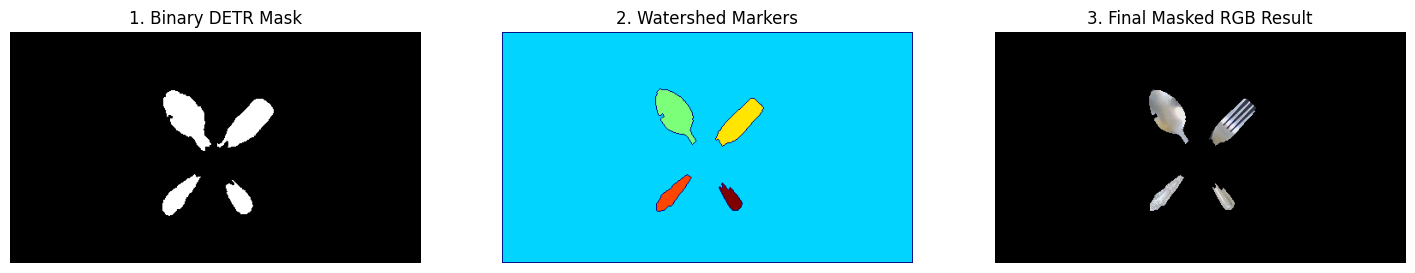

In [87]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Convert DETR panoptic_seg to a binary mask (uint8)
# This solves the 'Unsupported data type' error for morphological operations
h, w = pil_image.size[::-1] # Get height and width from PIL image
binary_mask = (panoptic_seg > 0).astype(np.uint8) * 255

# Resize binary mask to match the original image size if they differ
img_rgb = np.array(pil_image)
img_bgr = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR)
binary_mask = cv2.resize(binary_mask, (img_bgr.shape[1], img_bgr.shape[0]), interpolation=cv2.INTER_NEAREST)

# 2. Prepare Markers using Distance Transform
# This helps separate objects that are touching
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(binary_mask, cv2.MORPH_OPEN, kernel, iterations=2)

# Sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Sure foreground area (finding center of objects)
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.4 * dist_transform.max(), 255, 0)

# Finding unknown region (the boundaries to be calculated)
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# 3. Marker Labelling for Watershed
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1 # Add one to ensure background is not 0
markers[unknown == 255] = 0 # Mark boundary region as 0

# 4. Apply Watershed
# Watershed modifies markers in-place to find the exact edges
cv2.watershed(img_bgr, markers)

# 5. Mask the result on the RGB image
# Markers > 1 represents the detected objects (1 is background, -1 is boundary)
final_mask = np.zeros(markers.shape, dtype=np.uint8)
final_mask[markers > 1] = 255

# Apply the mask to the original image
masked_rgb = cv2.bitwise_and(img_rgb, img_rgb, mask=final_mask)

# --- Visualization ---
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(binary_mask, cmap='gray')
plt.title("1. Binary DETR Mask")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(markers, cmap='jet')
plt.title("2. Watershed Markers")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(masked_rgb)
plt.title("3. Final Masked RGB Result")
plt.axis('off')

plt.show()

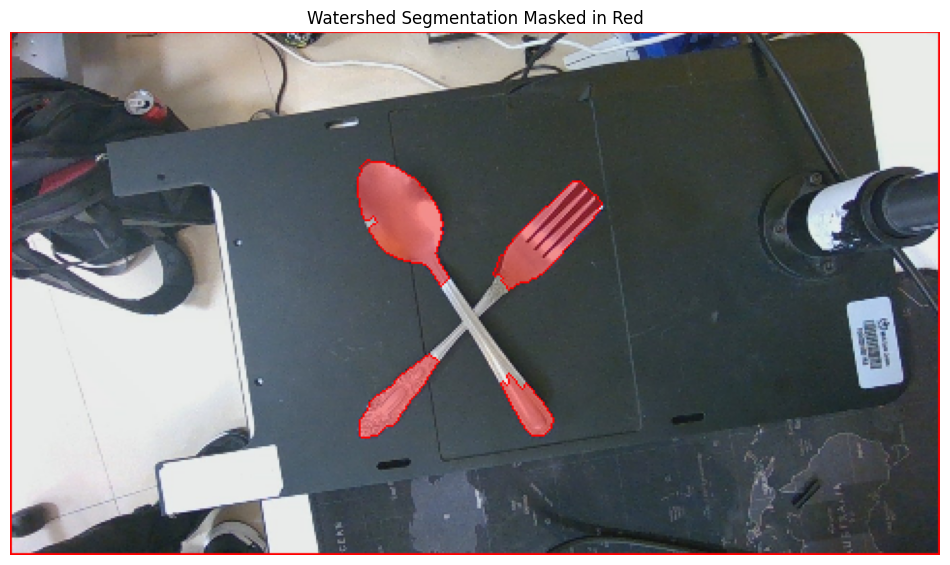

In [88]:
# 1. Prepare the mask: Identify object pixels and boundary pixels from Watershed
# markers > 1 are the detected objects; markers == -1 are the watershed lines
object_mask = (markers > 1) | (markers == -1)

# 2. Create a red color overlay
# We create a solid red image the same size as the original
red_overlay = np.zeros_like(original_image)
red_overlay[:] = [0, 0, 255]  # BGR format for Red

# 3. Apply the mask with transparency (alpha blending)
alpha = 0.4  # Adjust this (0.0 to 1.0) to change transparency
output_image = original_image.copy()

# Apply the red tint only to the masked pixels
output_image[object_mask] = cv2.addWeighted(
    original_image[object_mask], 1 - alpha, 
    red_overlay[object_mask], alpha, 0
).squeeze()

# 4. Optional: Draw the boundaries in solid red to make them distinct
output_image[markers == -1] = [0, 0, 255]

# 5. Display the result
plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.title("Watershed Segmentation Masked in Red")
plt.axis('off')
plt.show()